### 필수 함수

In [2]:
#엑셀 파일 불러오는 함수
import pandas as pd

def load_and_clean_data(filepath, header):
    df = pd.read_excel(filepath, header = header)

    new_columns = []
    for col in df.columns:
        merged_name = [str(c) for c in col if 'Unnamed' not in str(c)]
        new_columns.append(' '.join(merged_name).strip())

    df.columns = new_columns
    df= df.fillna(method='ffill', axis=0)

    return df

In [3]:
def clean_col_name(df, cols):
    df = df.copy()
    for col in cols:
        df[col] = (
            df[col]
            .astype(str)                                   # NaN 대비
            .str.replace('·', '', regex=False)
            .str.replace('・', '', regex=False)
            .str.replace('?', '', regex=False)
            .str.strip()
            .str.replace(' ', '', regex=False)             # 모든 띄어쓰기 제거
        )
    return df

In [4]:
# import re
# import unicodedata as ud
# import pandas as pd

# def _normalize_one(x: str, remove_all_spaces: bool = False) -> str:
#     if x is None:
#         return ""
#     s = str(x)

#     # 1) 유니코드 정규화 (전각/반각 통일)
#     s = ud.normalize("NFKC", s)

#     # 2) 보이지 않는 문자/특수 공백 제거
#     #    제로폭 공백, soft hyphen, BOM 등
#     s = re.sub(r"[\u200b\u200c\u200d\u2060\u00ad\ufeff]", "", s)

#     # 3) NBSP/전각 공백 → 일반 공백
#     s = s.replace("\u00A0", " ").replace("\u3000", " ")

#     # 4) 특정 기호 제거/치환
#     s = s.replace("·", "").replace("・", "").replace("?", "")

#     # 5) 하이픈/언더바 변형 통일
#     #    다양한 하이픈류 → 보통 '-'로, 전각 언더바(FF3F) → '_'
#     s = re.sub(r"[\u2010\u2011\u2012\u2013\u2014\u2212]", "-", s)  # hyphen-like
#     s = s.replace("\uFF3F", "_")  # FULLWIDTH LOW LINE → '_'

#     # 6) 언더바/괄호/하이픈 주변 공백 제거
#     #    " ) _ " → ")_", "( _" → "(_", "- "→"-", " -"→"-"
#     s = re.sub(r"\s*_\s*", "_", s)            # 언더바 주변 공백 완전 제거
#     s = re.sub(r"\s+([)\]-])", r"\1", s)      # 기호 앞 공백 제거
#     s = re.sub(r"([(\[-])\s+", r"\1", s)      # 기호 뒤 공백 제거

#     # 7) 좌우 공백 정리 + 내부 공백 정책
#     s = s.strip()
#     if remove_all_spaces:
#         s = re.sub(r"\s+", "", s)             # 모든 공백 제거
#     else:
#         s = re.sub(r"\s+", " ", s)            # 연속 공백을 1개로

#     return s

# def clean_col_name(df: pd.DataFrame, cols, remove_all_spaces: bool = False) -> pd.DataFrame:
#     df = df.copy()
#     for col in cols:
#         df.loc[:, col] = df[col].astype(str).map(lambda v: _normalize_one(v, remove_all_spaces))
#     return df


### 투입

In [5]:
#신입생 충원율 및 경쟁률
freshman_df = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2023년 _대학_4-다. 신입생 충원 현황_학교별자료.xlsx", [3,4,5])

freshman_df['기준연도'] = freshman_df['기준연도'].astype(int)

freshman_df_selected = freshman_df[['기준연도', '학교종류', '설립구분', '지역', '상태', '학교','정원내\n신입생 충원율(%)\n(D/B) × 100', '경쟁률\n(C/B)']].copy()
freshman_df_selected.rename(columns = {'정원내\n신입생 충원율(%)\n(D/B) × 100' : '신입생 충원율', '경쟁률\n(C/B)' : '신입생 경쟁률'}, inplace = True)

freshman_df_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_25388\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


,기준연도,학교종류,설립구분,지역,상태,학교,신입생 충원율,신입생 경쟁률
0,2023,대학교,사립,경남,기존,가야대학교(김해),82.2,6.8
1,2023,대학교,사립,경기,기존,가천대학교,100.0,16.8
2,2023,대학교,사립,강원,기존,가톨릭관동대학교,60.4,3.7
3,2023,대학교,사립,충북,기존,가톨릭꽃동네대학교,97.3,7.5
4,2023,대학교,사립,경기,기존,가톨릭대학교,99.9,13.2


In [6]:
#외국인 학생 수
foreign_df = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2023년 _대학_4-바-1. 외국학생 현황_학교별자료.xlsx", [3,4,5,6])

foreign_df['기준연도'] = foreign_df['기준연도'].astype(int)

foreign_df_selected = foreign_df[['기준연도', '학교종류', '설립구분', '지역', '상태', '학교', '계\n(D=A+B+C)']]
foreign_df_selected.rename(columns = {'계\n(D=A+B+C)' : '외국인 학생수'}, inplace = True)

foreign_df_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_25388\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)
C:\Users\윤서현\AppData\Local\Temp\ipykernel_25388\4272067660.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foreign_df_selected.rename(columns = {'계\n(D=A+B+C)' : '외국인 학생수'}, inplace = True)


,기준연도,학교종류,설립구분,지역,상태,학교,외국인 학생수
0,2023,대학교,사립,경남,기존,가야대학교(김해),17
1,2023,대학교,사립,경기,기존,가천대학교,2743
2,2023,대학교,사립,강원,기존,가톨릭관동대학교,83
3,2023,대학교,사립,충북,기존,가톨릭꽃동네대학교,2
4,2023,대학교,사립,경기,기존,가톨릭대학교,815


### 관리

In [7]:
#재학생충원율
fte_df = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2023년 _대학_4-라-1. 재학생 충원율_학교별자료.xlsx",[3,4])
fte_df_2 = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2024년 _대학_4-라-1. 재학생 충원율_학교별자료.xlsx",[3,4])

fte_df_first = fte_df[fte_df['기준연도'] == '2023 년 상반기']
fte_df_sec = fte_df_2[fte_df_2['기준연도'] == '2023 년 하반기']

fte_df_first_selected = fte_df_first[['기준연도','학교종류','설립구분','지역','상태','학교','학생정원(A)','재학생 계(C)','재학생 정원내(D)','정원내 재학생 충원율(%){D/(A-B)}\nX100']].copy()
fte_df_sec_selected = fte_df_sec[['기준연도','학교종류','설립구분','지역','상태','학교','학생정원(A)','재학생 계(C)','재학생 정원내(D)','정원내 재학생 충원율(%){D/(A-B)}\nX100']].copy()

# 두 DataFrame을 수직 결합
fte_df_final = pd.concat([fte_df_first_selected, fte_df_sec_selected], ignore_index=True)

# 기준연도에서 연도(숫자)만 추출
fte_df_final['연도'] = fte_df_final['기준연도'].str.extract(r'(\d{4})')
fte_df_final['연도'] = fte_df_final['연도'].astype(int)

# 연도 및 학교 기준으로 평균 계산
fte_df_final = fte_df_final.groupby(['연도', '학교'])[
    ['정원내 재학생 충원율(%){D/(A-B)}\nX100']
].mean().reset_index()

fte_df_final.rename(columns = {'정원내 재학생 충원율(%){D/(A-B)}\nX100' : '재학생 충원율'}, inplace = True)

fte_df_final.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_25388\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)
C:\Users\윤서현\AppData\Local\Temp\ipykernel_25388\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


,연도,학교,재학생 충원율
0,2023,가야대학교(고령) _제2캠퍼스,0.00
1,2023,가야대학교(김해),75.75
2,2023,가천대학교,96.95
3,2023,가톨릭관동대학교,68.75
4,2023,가톨릭꽃동네대학교,89.50


In [8]:
#중도탈락률
drop_df = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2024년 _대학_4-사. 중도탈락 학생 현황_학교별자료.xlsx", [3,4])

drop_df['기준연도'] = drop_df['기준연도'].astype(int)

drop_df_selected = drop_df[['기준연도', '학교종류', '설립구분', '지역', '상태', '학교','재적학생\n(A)','중도탈락학생비율(%)\n(B/A) × 100']].copy()
drop_df_selected.rename(columns = {'중도탈락학생비율(%)\n(B/A) × 100' : '중도탈락률','재적학생\n(A)' : '재적학생'}, inplace = True)

drop_df_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_25388\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


,기준연도,학교종류,설립구분,지역,상태,학교,재적학생,중도탈락률
0,2023,대학교,사립,경남,기존,가야대학교(김해),2153,9.6
1,2023,대학교,사립,경기,기존,가천대학교,27102,3.6
2,2023,대학교,사립,강원,기존,가톨릭관동대학교,9398,9.2
3,2023,대학교,사립,충북,기존,가톨릭꽃동네대학교,554,5.2
4,2023,대학교,사립,경기,기존,가톨릭대학교,9546,3.8


In [9]:
#전임교원확보율(정원내)
get_profes_df = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2023년 _대학_6-나-(1). 전임교원 1인당 학생 수 및 전임교원 확보율_학교별자료.xlsx", [3,4,5,6])

get_profes_df['기준연도'] = get_profes_df['기준연도'].astype(int)

get_profes_df_selected = get_profes_df[['기준연도', '학교종류', '설립구분', '지역', '상태정보', '학교', '전임교원 확보율 학생정원\n기준(B/Cx100)',]].copy()
#'학생현황 학부 학생정원', '학생현황 학부 재학생', '전임교원 확보율 재학생\n기준(B`/C`x100)'
get_profes_df_selected.rename(columns = {'전임교원 확보율 학생정원\n기준(B/Cx100)' : '전임교원확보율'}, inplace = True)
get_profes_df_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_25388\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


,기준연도,학교종류,설립구분,지역,상태정보,학교,전임교원확보율
0,2023,대학교,사립,경북,기존,가야대학교(고령) _제2캠퍼스,0.00
1,2023,대학교,사립,경남,기존,가야대학교(김해),71.03
2,2023,대학교,사립,경기,기존,가천대학교,103.76
3,2023,대학교,사립,강원,기존,가톨릭관동대학교,94.19
4,2023,대학교,사립,충북,기존,가톨릭꽃동네대학교,85.19


In [10]:
#전임교원 강의비율
lecture_df = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2023년 _대학_12-나-2. 교원 강의 담당 비율_학교별자료.xlsx", [3,4,5,6])

lecture_df['기준연도'] = lecture_df['기준연도'].astype(int)
lecture_df_selected = lecture_df[['기준연도', '학교종류', '설립구분', '지역', '상태', '학교', '학기','전임교원 비율']].copy()

lecture_avg = (
    lecture_df_selected
    .groupby('학교', as_index=False)['전임교원 비율']
    .mean()
)
lecture_avg.rename(columns ={'전임교원 비율' : '전임교원강의비율'}, inplace = True)
lecture_avg.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_25388\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


,학교,전임교원강의비율
0,가야대학교(김해),69.40
1,가천대학교,61.20
2,가톨릭관동대학교,78.20
3,가톨릭꽃동네대학교,72.65
4,가톨릭대학교,59.90


### 재정

In [11]:
#학생1인당교육비
edu_money_national = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2024년 _대학_9-나-1. 학생 1인당 교육비(국·공립대, 국립대법인, 특별법국립, 특별법법인)_학교별자료.xlsx", header = [3,4])
edu_money_private = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2024년 _대학_9-나-2. 학생 1인당 교육비(사립)_학교별자료.xlsx", header = [3,4])

edu_money_national.rename(columns = {'학생1인당 교육비\n(H=F/G)' : '학생1인당교육비'}, inplace = True)
edu_money_private.rename(columns = {'학생1인당\n교육비(G=E/F)' : '학생1인당교육비'}, inplace = True)

edu_money = pd.concat([edu_money_national, edu_money_private], axis=0)
edu_money['기준연도'] = edu_money['기준연도'].astype(int)

edu_money_selected = edu_money[['기준연도', '학교종류', '설립구분', '지역', '상태', '학교', '학생1인당교육비']].copy()
edu_money_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_25388\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)
C:\Users\윤서현\AppData\Local\Temp\ipykernel_25388\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


,기준연도,학교종류,설립구분,지역,상태,학교,학생1인당교육비
0,2023,대학교,국립,강원,기존,강원대학교,22479430.0
1,2023,대학교,국립,강원,기존,강원대학교 _제2캠퍼스,0.0
2,2023,대학교,국립,경남,폐교,경남과학기술대학교,0.0
3,2023,대학교,국립,대구,기존,경북대학교,26453279.1
4,2023,대학교,국립,경남,기존,경상국립대학교,22853576.1


In [12]:
#재학생1인당장학금
scholarship = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2024년 _대학_12-다-1. 장학금 수혜 현황_학교별자료.xlsx", header = [3,4,5,6])

scholarship['기준연도'] = scholarship['기준연도'].astype(int)
scholarship_selected = scholarship[['기준연도','설립구분', '지역', '상태', '학교명','재학생 1인당\n장학금\n(D=B/A)']].copy()
scholarship_selected.rename(columns = {'재학생 1인당\n장학금\n(D=B/A)' : '재학생1인당장학금'}, inplace = True)
scholarship_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_25388\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


,기준연도,설립구분,지역,상태,학교명,재학생1인당장학금
0,2023,사립,경남,기존,가야대학교(김해),4000371.0
1,2023,사립,경기,기존,가천대학교,3453285.5
2,2023,사립,강원,기존,가톨릭관동대학교,3753431.8
3,2023,사립,충북,기존,가톨릭꽃동네대학교,5503651.4
4,2023,사립,경기,기존,가톨릭대학교,3274481.5


In [13]:
#등록금
tuition = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2023년 _대학_8-차-1. 등록금 현황_학교별자료.xlsx", header = [3,4] )

tuition['기준연도'] = tuition['기준연도'].astype(int)
tuition_selected = tuition[['기준연도','설립구분','상태','학교','등록금\n(D=B)']]
tuition_selected.rename(columns = {'등록금\n(D=B)': '등록금'}, inplace = True)

tuition_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_25388\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)
C:\Users\윤서현\AppData\Local\Temp\ipykernel_25388\3204769344.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tuition_selected.rename(columns = {'등록금\n(D=B)': '등록금'}, inplace = True)


,기준연도,설립구분,상태,학교,등록금
0,2023,사립,기존,가야대학교(김해),6833449.7
1,2023,사립,기존,가천대학교,8330044.3
2,2023,사립,기존,가톨릭관동대학교,7185831.2
3,2023,사립,기존,가톨릭꽃동네대학교,7397203.7
4,2023,사립,기존,가톨릭대학교,7071831.5


### 성과

In [14]:
#취업률
rate = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2024년 _대학_5-다. 졸업생의 취업 현황_학교별자료.xlsx", header = [3,4,5,6,7])

rate['연도'] = rate['연도'].astype(int)
rate_selected = rate[['연도','설립구분','지역','상태','학교명','취업률(%)\n[B/{A-(C+D+E+F+G)}]x100']]
rate_selected.rename(columns = {'취업률(%)\n[B/{A-(C+D+E+F+G)}]x100' : '취업률'}, inplace = True)

rate_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_25388\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)
C:\Users\윤서현\AppData\Local\Temp\ipykernel_25388\3630653953.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_selected.rename(columns = {'취업률(%)\n[B/{A-(C+D+E+F+G)}]x100' : '취업률'}, inplace = True)


,연도,설립구분,지역,상태,학교명,취업률
0,2023,사립,경남,기존,가야대학교(김해),76.2
1,2023,사립,경기,기존,가천대학교,69.6
2,2023,사립,강원,기존,가톨릭관동대학교,64.6
3,2023,사립,충북,기존,가톨릭꽃동네대학교,74.4
4,2023,사립,경기,기존,가톨릭대학교,63.3


In [15]:
#교원 1인당 연구실적
#국내 / sci / 저역서

research_df = load_and_clean_data(r"C:\Users\윤서현\Desktop\8페이지\2024년 _대학_7-가. 전임교원의 연구 실적_학교별자료.xlsx", header = [3,4,5,6,7])
research_df['기준연도'] = research_df['기준연도'].astype(int)

research_df_selected = research_df[['기준연도', '설립구분', '지역', '상태', '학교','전임교원 1인당 논문 실적 국내\n기준 계', '전임교원 1인당 논문 실적 SCI급\n/SCOPUS\n학술지 계','전임교원 1인당 저∙역서 실적 계']].copy()

research_df_selected.head()

C:\Users\윤서현\AppData\Local\Temp\ipykernel_25388\3884397518.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df= df.fillna(method='ffill', axis=0)


,기준연도,설립구분,지역,상태,학교,전임교원 1인당 논문 실적 국내\n기준 계,전임교원 1인당 논문 실적 SCI급\n/SCOPUS\n학술지 계,전임교원 1인당 저∙역서 실적 계
0,2023,사립,경남,기존,가야대학교(김해),0.6330,0.0184,0.1276
1,2023,사립,경기,기존,가천대학교,0.3106,0.7838,0.0482
2,2023,사립,강원,기존,가톨릭관동대학교,0.4225,0.1665,0.0495
3,2023,사립,충북,기존,가톨릭꽃동네대학교,0.6757,0.0900,0.5854
4,2023,사립,경기,기존,가톨릭대학교,0.7036,0.3355,0.0463


## 병합하기

In [16]:
#지역 / 사립-국립구분

In [17]:
#투입
foreign_df_selected.head()

,기준연도,학교종류,설립구분,지역,상태,학교,외국인 학생수
0,2023,대학교,사립,경남,기존,가야대학교(김해),17
1,2023,대학교,사립,경기,기존,가천대학교,2743
2,2023,대학교,사립,강원,기존,가톨릭관동대학교,83
3,2023,대학교,사립,충북,기존,가톨릭꽃동네대학교,2
4,2023,대학교,사립,경기,기존,가톨릭대학교,815


In [18]:
freshman_df_selected.head()

,기준연도,학교종류,설립구분,지역,상태,학교,신입생 충원율,신입생 경쟁률
0,2023,대학교,사립,경남,기존,가야대학교(김해),82.2,6.8
1,2023,대학교,사립,경기,기존,가천대학교,100.0,16.8
2,2023,대학교,사립,강원,기존,가톨릭관동대학교,60.4,3.7
3,2023,대학교,사립,충북,기존,가톨릭꽃동네대학교,97.3,7.5
4,2023,대학교,사립,경기,기존,가톨릭대학교,99.9,13.2


In [19]:
input_df = pd.merge(freshman_df_selected,foreign_df_selected, how = 'outer')
input_df = input_df.sort_values(by='학교').reset_index(drop=True)

In [20]:
input_df

,기준연도,학교종류,설립구분,지역,상태,학교,신입생 충원율,신입생 경쟁률,외국인 학생수
0,2023,대학교,사립,경남,기존,가야대학교(김해),82.2,6.8,17.0
1,2023,대학교,사립,경기,기존,가천대학교,100.0,16.8,2743.0
2,2023,대학교,사립,강원,기존,가톨릭관동대학교,60.4,3.7,83.0
3,2023,대학교,사립,충북,기존,가톨릭꽃동네대학교,97.3,7.5,2.0
4,2023,대학교,사립,경기,기존,가톨릭대학교,99.9,13.2,815.0
...,...,...,...,...,...,...,...,...,...
238,2023,산업대학,사립,전북,기존,호원대학교,96.0,9.4,917.0
239,2023,대학교,사립,서울,기존,홍익대학교,99.9,18.1,1562.0
240,2023,대학교,사립,세종,기존,홍익대학교 _제2캠퍼스,99.5,8.5,96.0
241,2023,대학교,사립,경기,기존,화성의과학대학교,58.3,5.7,NaN


---

In [21]:
#관리
fte_df_final.drop(columns = '연도', inplace = True)
fte_df_final = clean_col_name(fte_df_final, ['학교'])
fte_df_final.head()

,학교,재학생 충원율
0,가야대학교(고령)_제2캠퍼스,0.00
1,가야대학교(김해),75.75
2,가천대학교,96.95
3,가톨릭관동대학교,68.75
4,가톨릭꽃동네대학교,89.50


In [22]:
drop_df_selected.head()
drop_df_selected = clean_col_name(drop_df_selected,['학교'])

In [23]:
manage_df_1 = pd.merge(drop_df_selected,fte_df_final, on = '학교', how = 'outer')

In [24]:
manage_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   기준연도     246 non-null    float64
 1   학교종류     246 non-null    object 
 2   설립구분     246 non-null    object 
 3   지역       246 non-null    object 
 4   상태       246 non-null    object 
 5   학교       252 non-null    object 
 6   재적학생     246 non-null    float64
 7   중도탈락률    246 non-null    float64
 8   재학생 충원율  251 non-null    float64
dtypes: float64(4), object(5)
memory usage: 17.8+ KB


In [25]:
manage_df_1 = clean_col_name(manage_df_1, ['학교'])

In [26]:
get_profes_df_selected = clean_col_name(get_profes_df_selected, ['학교'])

In [27]:
manage_df_2 = pd.merge(manage_df_1, get_profes_df_selected, how = 'outer')

In [28]:
manage_df_2[manage_df_2['학교'].str.contains('가야')]

,기준연도,학교종류,설립구분,지역,상태,학교,재적학생,중도탈락률,재학생 충원율,상태정보,전임교원확보율
90,2023.0,대학교,사립,경남,기존,가야대학교(김해),2153.0,9.6,75.75,기존,71.03
97,2023.0,대학교,사립,경북,NaN,가야대학교(고령)_제2캠퍼스,NaN,NaN,NaN,기존,0.00
252,NaN,NaN,NaN,NaN,NaN,가야대학교(고령)_제2캠퍼스,NaN,NaN,0.00,NaN,NaN


In [29]:
manage_df_2 = clean_col_name(manage_df_2, ['학교'])
lecture_avg = clean_col_name(lecture_avg, ['학교'])

In [30]:
manage_df_3 = pd.merge(manage_df_2, lecture_avg, how = 'outer')

In [31]:
manage_df_3['기준연도'] = manage_df_3['기준연도'].fillna('2023')
manage_df_3['기준연도'] = manage_df_3['기준연도'].astype(int)

In [32]:
manage_df_3.head()

,기준연도,학교종류,설립구분,지역,상태,학교,재적학생,중도탈락률,재학생 충원율,상태정보,전임교원확보율,전임교원강의비율
0,2023,대학교,사립,경북,NaN,가야대학교(고령)_제2캠퍼스,NaN,NaN,NaN,기존,0.00,NaN
1,2023,NaN,NaN,NaN,NaN,가야대학교(고령)_제2캠퍼스,NaN,NaN,0.00,NaN,NaN,NaN
2,2023,대학교,사립,경남,기존,가야대학교(김해),2153.0,9.6,75.75,기존,71.03,69.4
3,2023,대학교,사립,경기,기존,가천대학교,27102.0,3.6,96.95,기존,103.76,61.2
4,2023,대학교,사립,강원,기존,가톨릭관동대학교,9398.0,9.2,68.75,기존,94.19,78.2


In [33]:
# manage_df_3['학교'].duplicated().sum()

In [34]:
# # 어떤 학교명이 중복인지(이름과 개수)
# (manage_df_3['학교']
#  .value_counts()
#  .reset_index(name='cnt')
#  .rename(columns={'index':'학교'})
#  .query('cnt > 1')
# )

# # 중복된 행들만 인덱스까지 같이 보기
# dup_rows = manage_df_3[manage_df_3['학교'].duplicated(keep=False)] \
#             .sort_values('학교')
# dup_rows


---

In [35]:
#재정
#finan
edu_money_selected = clean_col_name(edu_money_selected,['학교'])
scholarship_selected.rename(columns = {'학교명' : '학교'}, inplace = True)
scholarship_selected = clean_col_name(scholarship_selected, ['학교'])
tuition_selected = clean_col_name(tuition_selected, ['학교'])

In [36]:
finan_1 = pd.merge(edu_money_selected,scholarship_selected, how = 'outer')

In [37]:
finan_2 = pd.merge(finan_1,tuition_selected, how = 'outer' )
finan_2.rename(columns = {'학생1인당교육비':'1인당 교육비', '재학생1인당장학금':'장학금'}, inplace = True)

In [38]:
finan_2

,기준연도,학교종류,설립구분,지역,상태,학교,1인당 교육비,장학금,등록금
0,2023,대학교,공립,서울,기존,서울시립대학교,20126574.7,2249961.1,2395890.4
1,2023,대학교,국립,강원,기존,강원대학교,22479430.0,2811111.3,4102933.2
2,2023,대학교,국립,강원,기존,강원대학교_제2캠퍼스,0.0,3509569.2,4247955.6
3,2023,대학교,국립,대구,기존,경북대학교,26453279.1,2959570.5,4499842.9
4,2023,대학교,국립,경남,기존,경상국립대학교,22853576.1,3017034.6,4075878.6
...,...,...,...,...,...,...,...,...,...
244,2023,대학교,특별법법인,광주,기존,광주과학기술원,92229650.7,6584949.5,2060000.0
245,2023,대학교,특별법법인,대구,기존,대구경북과학기술원,99818184.2,2869046.9,7280000.0
246,2023,대학교,특별법법인,울산,기존,울산과학기술원,84719479.8,6608081.2,6211366.7
247,2023,대학교,특별법법인,대전,기존,한국과학기술원,99738325.0,7248457.4,6866000.0


---

In [39]:
#성과
#acc
rate_selected.rename(columns = {'학교명' : '학교','연도' : '기준연도'}, inplace = True)
rate_selected = clean_col_name(rate_selected, ['학교'])
research_df_selected = clean_col_name(research_df_selected, ['학교'])

acc = pd.merge(rate_selected,research_df_selected,how = 'outer')

C:\Users\윤서현\AppData\Local\Temp\ipykernel_25388\1311191886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_selected.rename(columns = {'학교명' : '학교','연도' : '기준연도'}, inplace = True)


In [40]:
acc.rename(columns = {'전임교원 1인당 논문 실적 국내\n기준 계' : '교원연구(국내)',
                      '전임교원 1인당 논문 실적 SCI급\n/SCOPUS\n학술지 계': '교원연구(SCI)',
                      '전임교원 1인당 저∙역서 실적 계' : '교원연구(저역서)'}, inplace = True)

----

In [41]:
#대학운영측면
#acc, input_df, finan_2,manage_df_3

In [42]:
acc.info()
acc = clean_col_name(acc, ['설립구분','지역','상태','학교'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   기준연도       247 non-null    int64  
 1   설립구분       247 non-null    object 
 2   지역         247 non-null    object 
 3   상태         247 non-null    object 
 4   학교         247 non-null    object 
 5   취업률        243 non-null    float64
 6   교원연구(국내)   243 non-null    float64
 7   교원연구(SCI)  243 non-null    float64
 8   교원연구(저역서)  243 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 17.5+ KB


In [43]:
input_df.info()
input_df = clean_col_name(input_df, ['학교종류','설립구분','지역','상태','학교'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   기준연도     243 non-null    int64  
 1   학교종류     243 non-null    object 
 2   설립구분     243 non-null    object 
 3   지역       243 non-null    object 
 4   상태       243 non-null    object 
 5   학교       243 non-null    object 
 6   신입생 충원율  243 non-null    float64
 7   신입생 경쟁률  243 non-null    float64
 8   외국인 학생수  220 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 17.2+ KB


In [44]:
final_1 = pd.merge(acc, input_df, how = 'outer', on = ['기준연도','학교','상태','지역','설립구분'])

In [45]:
final_1

,기준연도,설립구분,지역,상태,학교,취업률,교원연구(국내),교원연구(SCI),교원연구(저역서),학교종류,신입생 충원율,신입생 경쟁률,외국인 학생수
0,2023,사립,경남,기존,가야대학교(김해),76.2,0.6330,0.0184,0.1276,대학교,82.2,6.8,17.0
1,2023,사립,경기,기존,가천대학교,69.6,0.3106,0.7838,0.0482,대학교,100.0,16.8,2743.0
2,2023,사립,강원,기존,가톨릭관동대학교,64.6,0.4225,0.1665,0.0495,대학교,60.4,3.7,83.0
3,2023,사립,충북,기존,가톨릭꽃동네대학교,74.4,0.6757,0.0900,0.5854,대학교,97.3,7.5,2.0
4,2023,사립,경기,기존,가톨릭대학교,63.3,0.7036,0.3355,0.0463,대학교,99.9,13.2,815.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023,사립,전북,기존,호원대학교,75.0,0.4276,0.0178,0.0944,산업대학,96.0,9.4,917.0
245,2023,사립,서울,기존,홍익대학교,65.5,0.6880,0.2757,0.0669,대학교,99.9,18.1,1562.0
246,2023,사립,세종,기존,홍익대학교_제2캠퍼스,63.7,0.4799,0.3702,0.0263,대학교,99.5,8.5,96.0
247,2023,사립,경기,기존,화성의과학대학교,71.1,0.4715,0.1970,0.0229,대학교,58.3,5.7,NaN


In [46]:
finan_2

,기준연도,학교종류,설립구분,지역,상태,학교,1인당 교육비,장학금,등록금
0,2023,대학교,공립,서울,기존,서울시립대학교,20126574.7,2249961.1,2395890.4
1,2023,대학교,국립,강원,기존,강원대학교,22479430.0,2811111.3,4102933.2
2,2023,대학교,국립,강원,기존,강원대학교_제2캠퍼스,0.0,3509569.2,4247955.6
3,2023,대학교,국립,대구,기존,경북대학교,26453279.1,2959570.5,4499842.9
4,2023,대학교,국립,경남,기존,경상국립대학교,22853576.1,3017034.6,4075878.6
...,...,...,...,...,...,...,...,...,...
244,2023,대학교,특별법법인,광주,기존,광주과학기술원,92229650.7,6584949.5,2060000.0
245,2023,대학교,특별법법인,대구,기존,대구경북과학기술원,99818184.2,2869046.9,7280000.0
246,2023,대학교,특별법법인,울산,기존,울산과학기술원,84719479.8,6608081.2,6211366.7
247,2023,대학교,특별법법인,대전,기존,한국과학기술원,99738325.0,7248457.4,6866000.0


In [47]:
finan_2.info()
finan_2= clean_col_name(finan_2, ['학교종류','설립구분','지역','상태','학교'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   기준연도     249 non-null    int64  
 1   학교종류     228 non-null    object 
 2   설립구분     249 non-null    object 
 3   지역       246 non-null    object 
 4   상태       249 non-null    object 
 5   학교       249 non-null    object 
 6   1인당 교육비  228 non-null    float64
 7   장학금      246 non-null    float64
 8   등록금      245 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 17.6+ KB


In [48]:
final_2 = pd.merge(final_1,finan_2, how = 'outer',on = ['기준연도','학교종류','지역','상태','학교','설립구분'])

In [49]:
manage_df_3.info()
manage_df_3 = clean_col_name(manage_df_3, ['학교종류','설립구분','지역','상태','학교','상태정보'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기준연도      259 non-null    int64  
 1   학교종류      252 non-null    object 
 2   설립구분      252 non-null    object 
 3   지역        252 non-null    object 
 4   상태        246 non-null    object 
 5   학교        259 non-null    object 
 6   재적학생      246 non-null    float64
 7   중도탈락률     246 non-null    float64
 8   재학생 충원율   251 non-null    float64
 9   상태정보      232 non-null    object 
 10  전임교원확보율   232 non-null    float64
 11  전임교원강의비율  248 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 24.4+ KB


In [50]:
final_3 = pd.merge(final_2, manage_df_3, how = 'outer', on = ['기준연도','학교종류','지역','상태','학교','설립구분'])

In [51]:
# import numpy as np

# # 문자열인 칸에서 공백만 있는 값 -> NaN
# final_3 = final_3.applymap(lambda x: np.nan if isinstance(x, str) and x.strip()=='' else x)

# # 흔한 결측 문자열들을 NaN으로 통일
# final_3 = final_3.replace({'nan': np.nan, 'NaN': np.nan, 'None': np.nan, 'NULL': np.nan})

# # 상태 열이 NaN인 행 제거
# final_3 = final_3.dropna(subset=['상태'])


In [52]:
final_3

,기준연도,설립구분,지역,상태,학교,취업률,교원연구(국내),교원연구(SCI),교원연구(저역서),학교종류,...,외국인 학생수,1인당 교육비,장학금,등록금,재적학생,중도탈락률,재학생 충원율,상태정보,전임교원확보율,전임교원강의비율
0,2023,nan,nan,nan,가야대학교(고령)_제2캠퍼스,NaN,NaN,NaN,NaN,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,nan,NaN,NaN
1,2023,nan,nan,nan,경남과학기술대학교(폐교),NaN,NaN,NaN,NaN,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,65.7
2,2023,nan,nan,nan,영산대학교,NaN,NaN,NaN,NaN,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,80.9,nan,NaN,63.9
3,2023,nan,nan,nan,영산대학교_제2캠퍼스,NaN,NaN,NaN,NaN,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,90.0,nan,NaN,65.3
4,2023,nan,nan,nan,우송대학교(산업대),NaN,NaN,NaN,NaN,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2023,사립,경남,기존,영산대학교(양산)_제2캠퍼스,70.6,0.5781,0.1055,0.0607,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,2023,국립,경남,폐교,경남과학기술대학교,57.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,2023,국립,경북,기존,국립안동대학교,NaN,0.7496,0.3040,0.0958,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,2023,사립,부산,기존,영산대학교(해운대),65.2,0.3911,0.0628,0.0923,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
final_3_live = final_3[(final_3['상태'] != '폐교') | (final_3['학교'].str.contains('폐교'))]

In [54]:
final_3['학교종류'].unique()

array(['nan', '각종학교(대학)', '교육대학', '기술대학', '대학교', '방송통신대학', '사이버대학(대학)',
       '산업대학', nan], dtype=object)

In [55]:
import numpy as np
final_3 = (final_3.groupby('학교', as_index=False)
                     .agg(lambda x: x.dropna().iloc[0] if x.dropna().size > 0 else np.nan))


In [56]:
final_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   학교         254 non-null    object 
 1   기준연도       254 non-null    int64  
 2   설립구분       254 non-null    object 
 3   지역         254 non-null    object 
 4   상태         254 non-null    object 
 5   취업률        243 non-null    float64
 6   교원연구(국내)   243 non-null    float64
 7   교원연구(SCI)  243 non-null    float64
 8   교원연구(저역서)  243 non-null    float64
 9   학교종류       253 non-null    object 
 10  신입생 충원율    243 non-null    float64
 11  신입생 경쟁률    243 non-null    float64
 12  외국인 학생수    220 non-null    float64
 13  1인당 교육비    228 non-null    float64
 14  장학금        246 non-null    float64
 15  등록금        245 non-null    float64
 16  재적학생       246 non-null    float64
 17  중도탈락률      246 non-null    float64
 18  재학생 충원율    251 non-null    float64
 19  상태정보       253 non-null    object 
 20  전임교원확보율   

In [57]:
final_3['학교'].duplicated().sum()

np.int64(0)

In [58]:
final_3 = final_3.sort_values(by='학교', ascending=True)

In [59]:
final_3.columns

Index(['학교', '기준연도', '설립구분', '지역', '상태', '취업률', '교원연구(국내)', '교원연구(SCI)',
       '교원연구(저역서)', '학교종류', '신입생 충원율', '신입생 경쟁률', '외국인 학생수', '1인당 교육비', '장학금',
       '등록금', '재적학생', '중도탈락률', '재학생 충원율', '상태정보', '전임교원확보율', '전임교원강의비율'],
      dtype='object')

In [60]:
# 방법 1: loc 이용
final_3.loc[final_3['학교종류'].isnull(), '학교종류'] = '대학교'

In [61]:
import pandas as pd
import numpy as np

# df : 기존 데이터프레임
# '학교' 컬럼과 '학교종류' 컬럼이 있다고 가정

def fill_school_type(row, school_type_map):
    name = str(row['학교'])
    current_type = row['학교종류']

    # 이미 값이 있으면 그대로 둠
    if pd.notna(current_type) and current_type != 'nan':
        return current_type

    # 1. 이름 기반 규칙
    if '(산업대' in name:
        return '산업대학'
    elif '(사이버' in name:
        return '사이버대학(대학)'
    elif '(방송통신' in name:
        return '방송통신대학'
    elif '교육대학교' in name:
        return '교육대학'
    elif '예술종합학교' in name:
        return '각종학교(대학)'
    elif '(폐교' in name:
        # 폐교는 보통 본교 기준 "대학교" 처리
        return '대학교'
    
    # 2. 본교/분교 관계: 이름에 "_제"가 붙은 캠퍼스 → 본교 유형 상속
    if '_제' in name:
        base_name = name.split('_제')[0]
        if base_name in school_type_map:
            return school_type_map[base_name]

    # 3. 기본값
    return '대학교'

# 먼저 본교들의 mapping 딕셔너리 생성
school_type_map = (
    final_3_live[['학교', '학교종류']]
    .dropna()
    .set_index('학교')['학교종류']
    .to_dict()
)

# apply로 NaN 값 채우기
final_3_live['학교종류'] = final_3_live.apply(lambda row: fill_school_type(row, school_type_map), axis=1)


C:\Users\윤서현\AppData\Local\Temp\ipykernel_25388\1588373476.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_3_live['학교종류'] = final_3_live.apply(lambda row: fill_school_type(row, school_type_map), axis=1)


In [62]:
final_3_live['학교종류'].unique()

array(['대학교', '산업대학', '각종학교(대학)', '교육대학', '기술대학', '방송통신대학', '사이버대학(대학)'],
      dtype=object)

In [ ]:
final_4 = final_3_live[final_3_live['학교종류'] == '대학교']

In [73]:
final_4

,기준연도,설립구분,지역,상태,학교,취업률,교원연구(국내),교원연구(SCI),교원연구(저역서),학교종류,...,외국인 학생수,1인당 교육비,장학금,등록금,재적학생,중도탈락률,재학생 충원율,상태정보,전임교원확보율,전임교원강의비율
0,2023,nan,nan,nan,가야대학교(고령)_제2캠퍼스,NaN,NaN,NaN,NaN,대학교,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,nan,NaN,NaN
1,2023,nan,nan,nan,경남과학기술대학교(폐교),NaN,NaN,NaN,NaN,대학교,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,65.7
2,2023,nan,nan,nan,영산대학교,NaN,NaN,NaN,NaN,대학교,...,NaN,NaN,NaN,NaN,NaN,NaN,80.90,nan,NaN,63.9
3,2023,nan,nan,nan,영산대학교_제2캠퍼스,NaN,NaN,NaN,NaN,대학교,...,NaN,NaN,NaN,NaN,NaN,NaN,90.00,nan,NaN,65.3
6,2023,nan,nan,nan,한북대학교,NaN,NaN,NaN,NaN,대학교,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,2023,국립,충북,기존,한국교원대학교,59.3,1.6706,0.1740,0.0933,대학교,...,NaN,15541043.8,2618218.2,3179373.6,2558.0,3.0,95.05,기존,64.53,55.5
283,2023,사립,경남,기존,영산대학교(양산)_제2캠퍼스,70.6,0.5781,0.1055,0.0607,대학교,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,2023,국립,경북,기존,국립안동대학교,NaN,0.7496,0.3040,0.0958,대학교,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,2023,사립,부산,기존,영산대학교(해운대),65.2,0.3911,0.0628,0.0923,대학교,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# final_4.to_excel('0916대학운영측면데이터.xlsx', index = False)

## Z점수화

In [65]:
from scipy.stats import zscore

# -----------------------------
# 0. Z점수화할 컬럼 리스트
# -----------------------------
target_cols = [
    "취업률",
    '교원연구(국내)',
    '교원연구(SCI)',
    '교원연구(저역서)',
    "외국인 학생수",
    '1인당 교육비',
    "장학금",
    "등록금",
    "재적학생",
    "중도탈락률",
    "재학생 충원율",
    "전임교원확보율",
    "전임교원강의비율",
    "신입생 충원율",
    "신입생 경쟁률"
]

# -----------------------------
# 1. 전국 단위로 Z점수화 (+5 shift)
# -----------------------------
for col in target_cols:
    final_3_live[col + "_전국Z"] = 5 + zscore(final_3_live[col], nan_policy="omit")

zscore_cols = [col + "_전국Z" for col in target_cols]

# -----------------------------
# 2. 지역 평균
# -----------------------------
region_mean = (
    final_3_live.groupby("지역")[zscore_cols]
    .mean()
    .add_suffix("_지역평균")
)

# -----------------------------
# 3. 설립구분 평균
# -----------------------------
estab_mean = (
    final_3_live.groupby("설립구분")[zscore_cols]
    .mean()
    .add_suffix("_설립평균")
)

# -----------------------------
# 4. 지역 + 설립구분 평균
# -----------------------------
region_estab_mean = (
    final_3_live.groupby(["지역", "설립구분"])[zscore_cols]
    .mean()
    .add_suffix("_지역설립평균")
)

# -----------------------------
# 5. 최종 병합
# -----------------------------
df_result = (
    final_3_live
    .merge(region_mean, on="지역", how="left")
    .merge(estab_mean, on="설립구분", how="left")
    .merge(region_estab_mean, on=["지역", "설립구분"], how="left")
)



C:\Users\윤서현\AppData\Local\Temp\ipykernel_25388\1493854596.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_3_live[col + "_전국Z"] = 5 + zscore(final_3_live[col], nan_policy="omit")
C:\Users\윤서현\AppData\Local\Temp\ipykernel_25388\1493854596.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_3_live[col + "_전국Z"] = 5 + zscore(final_3_live[col], nan_policy="omit")
C:\Users\윤서현\AppData\Local\Temp\ipykernel_25388\1493854596.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [66]:
df_result

,기준연도,설립구분,지역,상태,학교,취업률,교원연구(국내),교원연구(SCI),교원연구(저역서),학교종류,...,1인당 교육비_전국Z_지역설립평균,장학금_전국Z_지역설립평균,등록금_전국Z_지역설립평균,재적학생_전국Z_지역설립평균,중도탈락률_전국Z_지역설립평균,재학생 충원율_전국Z_지역설립평균,전임교원확보율_전국Z_지역설립평균,전임교원강의비율_전국Z_지역설립평균,신입생 충원율_전국Z_지역설립평균,신입생 경쟁률_전국Z_지역설립평균
0,2023,nan,nan,nan,가야대학교(고령)_제2캠퍼스,NaN,NaN,NaN,NaN,대학교,...,NaN,NaN,NaN,NaN,NaN,2.403832,NaN,5.115137,NaN,NaN
1,2023,nan,nan,nan,경남과학기술대학교(폐교),NaN,NaN,NaN,NaN,대학교,...,NaN,NaN,NaN,NaN,NaN,2.403832,NaN,5.115137,NaN,NaN
2,2023,nan,nan,nan,영산대학교,NaN,NaN,NaN,NaN,대학교,...,NaN,NaN,NaN,NaN,NaN,2.403832,NaN,5.115137,NaN,NaN
3,2023,nan,nan,nan,영산대학교_제2캠퍼스,NaN,NaN,NaN,NaN,대학교,...,NaN,NaN,NaN,NaN,NaN,2.403832,NaN,5.115137,NaN,NaN
4,2023,nan,nan,nan,우송대학교(산업대),NaN,NaN,NaN,NaN,산업대학,...,NaN,NaN,NaN,NaN,NaN,2.403832,NaN,5.115137,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,2023,국립,경기,기존,경인교육대학교_제2캠퍼스,62.0,NaN,NaN,NaN,교육대학,...,4.612168,4.335408,3.910327,4.564036,4.243803,3.358680,4.560556,4.763371,5.440591,4.905960
282,2023,사립,경남,기존,영산대학교(양산)_제2캠퍼스,70.6,0.5781,0.1055,0.0607,대학교,...,4.841638,5.347743,5.160329,4.642689,5.379517,4.982582,5.049159,5.527833,4.999318,4.645543
283,2023,국립,경북,기존,국립안동대학교,NaN,0.7496,0.3040,0.0958,대학교,...,5.084970,4.683432,3.772020,4.852774,4.723544,5.002386,4.882209,5.496426,5.108978,4.573928
284,2023,사립,부산,기존,영산대학교(해운대),65.2,0.3911,0.0628,0.0923,대학교,...,4.675832,4.949199,4.860595,5.103005,5.258766,5.021025,4.872601,5.332792,4.993177,4.570673


In [67]:
df_result[df_result['학교'].str.contains('강릉원주')]

,기준연도,설립구분,지역,상태,학교,취업률,교원연구(국내),교원연구(SCI),교원연구(저역서),학교종류,...,1인당 교육비_전국Z_지역설립평균,장학금_전국Z_지역설립평균,등록금_전국Z_지역설립평균,재적학생_전국Z_지역설립평균,중도탈락률_전국Z_지역설립평균,재학생 충원율_전국Z_지역설립평균,전임교원확보율_전국Z_지역설립평균,전임교원강의비율_전국Z_지역설립평균,신입생 충원율_전국Z_지역설립평균,신입생 경쟁률_전국Z_지역설립평균
47,2023,국립,강원,기존,국립강릉원주대학교,62.0,0.6217,0.3322,0.0627,대학교,...,4.669306,4.541749,3.911946,4.92954,4.472904,5.309925,4.916913,5.239762,5.449013,4.788773
48,2023,국립,강원,기존,국립강릉원주대학교_제2캠퍼스,62.6,0.8997,0.2511,0.2046,대학교,...,4.669306,4.541749,3.911946,4.92954,4.472904,5.309925,4.916913,5.239762,5.449013,4.788773


In [68]:
# df_result.to_excel('09118페이지1번Z점수화필터링후.xlsx', index = False)

In [69]:
df_result.columns

Index(['기준연도', '설립구분', '지역', '상태', '학교', '취업률', '교원연구(국내)', '교원연구(SCI)',
       '교원연구(저역서)', '학교종류', '신입생 충원율', '신입생 경쟁률', '외국인 학생수', '1인당 교육비', '장학금',
       '등록금', '재적학생', '중도탈락률', '재학생 충원율', '상태정보', '전임교원확보율', '전임교원강의비율',
       '취업률_전국Z', '교원연구(국내)_전국Z', '교원연구(SCI)_전국Z', '교원연구(저역서)_전국Z',
       '외국인 학생수_전국Z', '1인당 교육비_전국Z', '장학금_전국Z', '등록금_전국Z', '재적학생_전국Z',
       '중도탈락률_전국Z', '재학생 충원율_전국Z', '전임교원확보율_전국Z', '전임교원강의비율_전국Z',
       '신입생 충원율_전국Z', '신입생 경쟁률_전국Z', '취업률_전국Z_지역평균', '교원연구(국내)_전국Z_지역평균',
       '교원연구(SCI)_전국Z_지역평균', '교원연구(저역서)_전국Z_지역평균', '외국인 학생수_전국Z_지역평균',
       '1인당 교육비_전국Z_지역평균', '장학금_전국Z_지역평균', '등록금_전국Z_지역평균', '재적학생_전국Z_지역평균',
       '중도탈락률_전국Z_지역평균', '재학생 충원율_전국Z_지역평균', '전임교원확보율_전국Z_지역평균',
       '전임교원강의비율_전국Z_지역평균', '신입생 충원율_전국Z_지역평균', '신입생 경쟁률_전국Z_지역평균',
       '취업률_전국Z_설립평균', '교원연구(국내)_전국Z_설립평균', '교원연구(SCI)_전국Z_설립평균',
       '교원연구(저역서)_전국Z_설립평균', '외국인 학생수_전국Z_설립평균', '1인당 교육비_전국Z_설립평균',
       '장학금_전국Z_설립평균', '등록금_전국Z_설립평균', '재적학생_전국Z_설립평균', '중도탈락률_전국Z_설립평균',
       

## 시각화

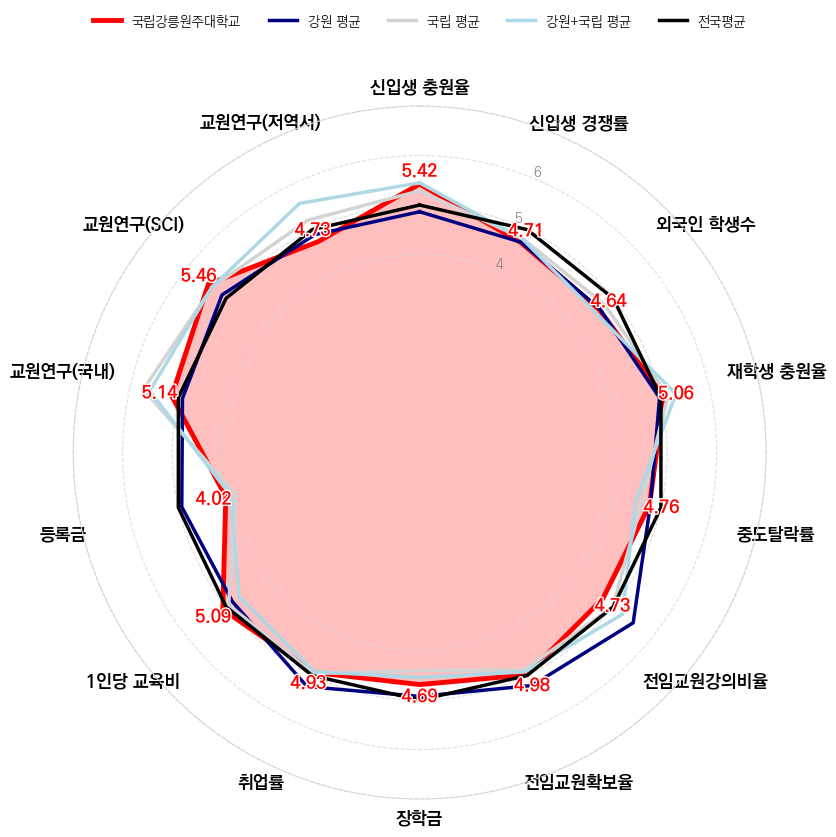

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects

# -----------------------------
# 한글 폰트 설정
# -----------------------------
font_path = r"C:\Users\윤서현\Downloads\KoPubWorld Dotum_Pro Medium.otf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# -----------------------------
# 데이터 준비 (강릉원주대 예시)
# -----------------------------
school_name = "국립강릉원주대학교"
row = df_result[df_result["학교"] == school_name].iloc[0]
school_region = row["지역"]
school_estab = row["설립구분"]


custom_order = ["신입생 충원율", "신입생 경쟁률", "외국인 학생수",  "재학생 충원율",
                "중도탈락률", "전임교원강의비율", "전임교원확보율", "장학금", "취업률", 
                "1인당 교육비", "등록금", "교원연구(국내)",
                "교원연구(SCI)", "교원연구(저역서)"]

labels = custom_order
num_vars = len(labels)

school_scores = row[[col + "_전국Z" for col in custom_order]].values
region_scores = row[[col + "_전국Z_지역평균" for col in custom_order]].values
estab_scores = row[[col + "_전국Z_설립평균" for col in custom_order]].values
region_estab_scores = row[[col + "_전국Z_지역설립평균" for col in custom_order]].values
nation_scores = np.array([5] * num_vars)  # 전국평균

scores_list = [school_scores, region_scores, estab_scores, region_estab_scores, nation_scores]
labels_list = [
    school_name,
    f"{school_region} 평균",
    f"{school_estab} 평균",
    f"{school_region}+{school_estab} 평균",
    "전국평균"
]

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# -----------------------------
# 레이더 차트 그리기
# -----------------------------
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))

colors = {
    school_name : "#FF0000",        # 빨강
    f"{school_region} 평균": "#000080",    # 남색
    f"{school_estab} 평균": "#D3D3D3",    # 밝은회색
    f"{school_region}+{school_estab} 평균": "#ADD8E6", # 연한파랑
    "전국평균": "#000000"     # 검정
}

for scores, lab in zip(scores_list, labels_list):
    values = np.concatenate((scores, [scores[0]]))
    angle_vals = np.concatenate((angles, [angles[0]]))
    
    if lab == school_name:  # 선택 대학만 색 채우기 + 더 굵은 선
        ax.plot(angle_vals, values, label=lab, color=colors[lab], linewidth=3.5)
        ax.fill(angle_vals, values, alpha=0.25, color=colors[lab])
    else:  # 나머지는 선만
        ax.plot(angle_vals, values, label=lab, color=colors[lab], linewidth=2.5)

# -----------------------------
# 축 설정 (흰색 배경 + 연회색 격자 유지)
# -----------------------------
ax.set_xticks(angles)
ax.set_xticklabels(labels, fontsize=13, weight="bold")
ax.set_theta_offset(np.pi / 2)  # 90도 회전
ax.set_theta_direction(-1)

ax.set_yticks([4, 5, 6, 7])
ax.set_yticklabels(["4", "5", "6", "7"], fontsize=10, color="gray")
ax.set_facecolor("white")

# 원형(동심원)만 남기기
ax.xaxis.grid(False)  # 세로선 제거
ax.yaxis.grid(True, linestyle="--", color="lightgray", alpha=0.7)
ax.spines['polar'].set_color("lightgray")
ax.spines['polar'].set_linestyle("--")

# -----------------------------
# 대학 점수값 표시 (빨강 + 흰색 윤곽선)
# -----------------------------
for angle, score in zip(angles, school_scores):
    txt = ax.text(angle, score + 0.25, f"{score:.2f}",
                  ha="center", va="center",
                  fontsize=13, color="red", weight="bold")
    txt.set_path_effects([path_effects.Stroke(linewidth=2, foreground="white"),
                          path_effects.Normal()])

# -----------------------------
# 제목 & 범례
# -----------------------------
# plt.title(f"{school_name} 레이더 차트", size=18, weight="bold", pad=40)
# ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1.1))
ax.legend(
    loc="upper center", 
    bbox_to_anchor=(0.5, 1.15),
    ncol = 5,
    title=None,     # 범례 제목 제거
    frameon=False   # (선택) 범례 박스 테두리 제거
)


plt.show()


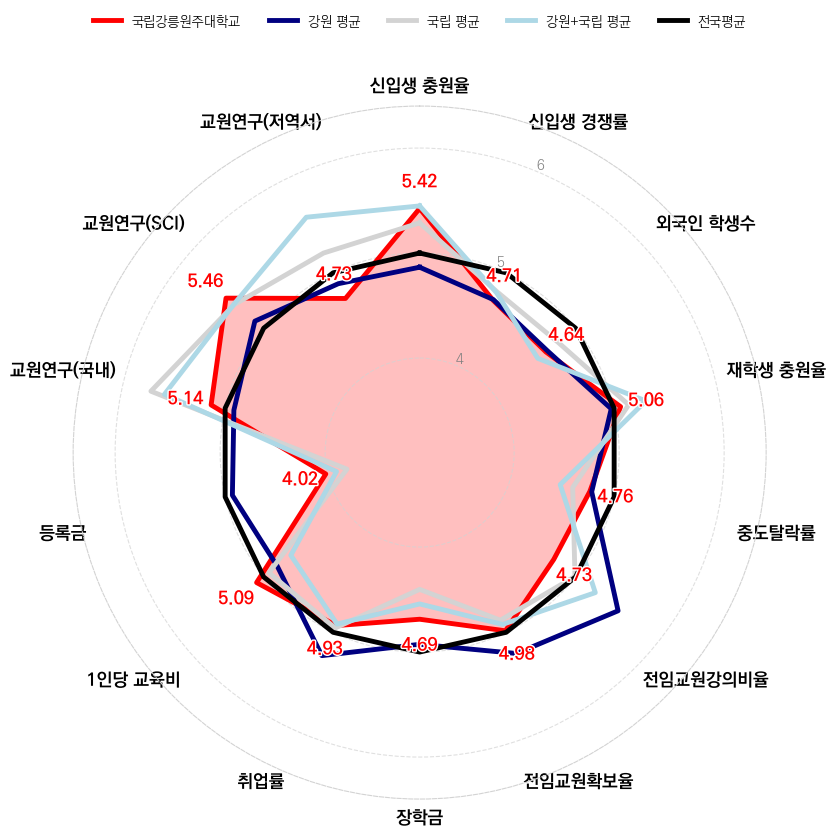

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects

# -----------------------------
# 한글 폰트 설정
# -----------------------------
font_path = r"C:\Users\윤서현\Downloads\KoPubWorld Dotum_Pro Medium.otf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# -----------------------------
# 데이터 준비 (강릉원주대 예시)
# -----------------------------
school_name = "국립강릉원주대학교"
row = df_result[df_result["학교"] == school_name].iloc[0]
school_region = row["지역"]
school_estab = row["설립구분"]


custom_order = ["신입생 충원율", "신입생 경쟁률", "외국인 학생수",  "재학생 충원율",
                "중도탈락률", "전임교원강의비율", "전임교원확보율", "장학금", "취업률", 
                "1인당 교육비", "등록금", "교원연구(국내)",
                "교원연구(SCI)", "교원연구(저역서)"]

labels = custom_order
num_vars = len(labels)

school_scores = row[[col + "_전국Z" for col in custom_order]].values
region_scores = row[[col + "_전국Z_지역평균" for col in custom_order]].values
estab_scores = row[[col + "_전국Z_설립평균" for col in custom_order]].values
region_estab_scores = row[[col + "_전국Z_지역설립평균" for col in custom_order]].values
nation_scores = np.array([5] * num_vars)  # 전국평균

scores_list = [school_scores, region_scores, estab_scores, region_estab_scores, nation_scores]
labels_list = [
    school_name,
    f"{school_region} 평균",
    f"{school_estab} 평균",
    f"{school_region}+{school_estab} 평균",
    "전국평균"
]

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# -----------------------------
# 레이더 차트 그리기
# -----------------------------
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))

colors = {
    school_name : "#FF0000",        # 빨강
    f"{school_region} 평균": "#000080",    # 남색
    f"{school_estab} 평균": "#D3D3D3",    # 밝은회색
    f"{school_region}+{school_estab} 평균": "#ADD8E6", # 연한파랑
    "전국평균": "#000000"     # 검정
}

for scores, lab in zip(scores_list, labels_list):
    values = np.concatenate((scores, [scores[0]]))
    angle_vals = np.concatenate((angles, [angles[0]]))
    
    if lab == school_name:  # 선택 대학만 색 채우기 + 더 굵은 선
        ax.plot(angle_vals, values, label=lab, color=colors[lab], linewidth=3.5)
        ax.fill(angle_vals, values, alpha=0.25, color=colors[lab])
    else:  # 나머지는 선만
        ax.plot(angle_vals, values, label=lab, color=colors[lab], linewidth=3.5)

# -----------------------------
# 축 설정 (흰색 배경 + 연회색 격자 유지)
# -----------------------------
ax.set_xticks(angles)
ax.set_xticklabels(labels, fontsize=13, weight="bold")
ax.set_theta_offset(np.pi / 2)  # 90도 회전
ax.set_theta_direction(-1)

ax.set_facecolor("white")
ax.set_ylim(3.1, 6.4) #y축 변경

ax.set_yticks([4, 5, 6])
ax.set_yticklabels(["4", "5", "6"], fontsize=10, color="gray")
ax.set_facecolor("white")



# 원형(동심원)만 남기기
ax.xaxis.grid(False)  # 세로선 제거
ax.yaxis.grid(True, linestyle="--", color="lightgray", alpha=0.7)
ax.spines['polar'].set_color("lightgray")
ax.spines['polar'].set_linestyle("--")

# -----------------------------
# 대학 점수값 표시 (빨강 + 흰색 윤곽선)
# -----------------------------
for angle, score in zip(angles, school_scores):
    txt = ax.text(angle, score + 0.25, f"{score:.2f}",
                  ha="center", va="center",
                  fontsize=13, color="red", weight="bold")
    txt.set_path_effects([path_effects.Stroke(linewidth=2, foreground="white"),
                          path_effects.Normal()])
for label in ax.get_xticklabels():
    label.set_zorder(10)  # 제일 앞에
    label.set_path_effects([
        path_effects.Stroke(linewidth=3, foreground="white"),
        path_effects.Normal()
    ])
# -----------------------------
# 제목 & 범례
# -----------------------------
# plt.title(f"{school_name} 레이더 차트", size=18, weight="bold", pad=40)
# ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1.1))
ax.legend(
    loc="upper center", 
    bbox_to_anchor=(0.5, 1.15),
    ncol = 5,
    title=None,     # 범례 제목 제거
    frameon=False   # (선택) 범례 박스 테두리 제거
)


plt.show()


Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


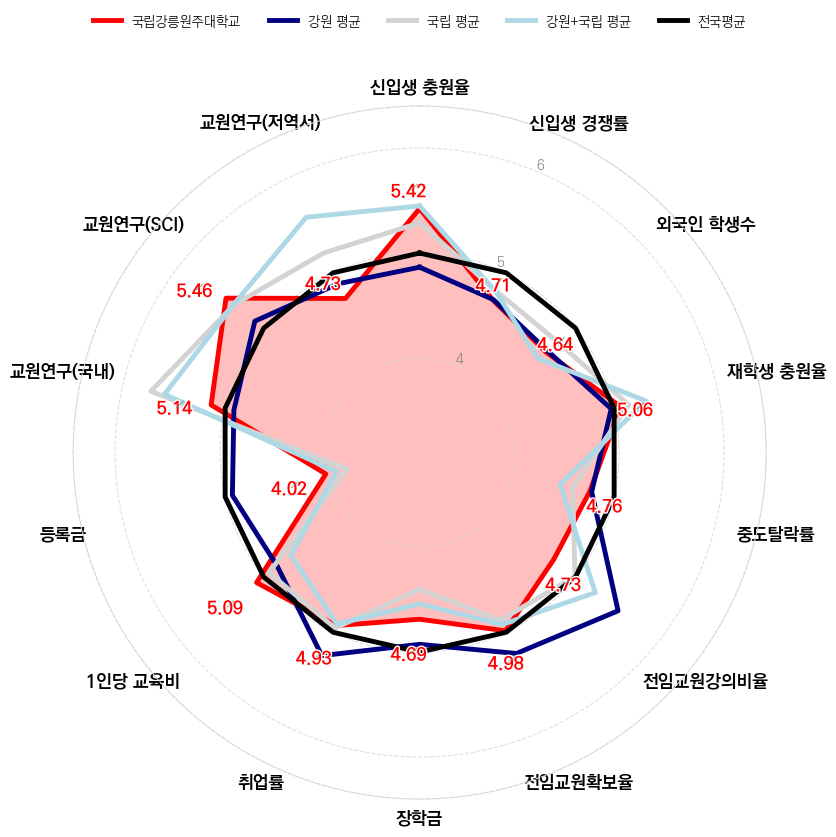

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects
from adjustText import adjust_text

# -----------------------------
# 한글 폰트 설정
# -----------------------------
font_path = r"C:\Users\윤서현\Downloads\KoPubWorld Dotum_Pro Medium.otf"
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# -----------------------------
# 데이터 준비 (강릉원주대 예시)
# -----------------------------
school_name = "국립강릉원주대학교"
row = df_result[df_result["학교"] == school_name].iloc[0]
school_region = row["지역"]
school_estab = row["설립구분"]

custom_order = ["신입생 충원율", "신입생 경쟁률", "외국인 학생수",  "재학생 충원율",
                "중도탈락률", "전임교원강의비율", "전임교원확보율", "장학금", "취업률", 
                "1인당 교육비", "등록금", "교원연구(국내)",
                "교원연구(SCI)", "교원연구(저역서)"]

labels = custom_order
num_vars = len(labels)

school_scores = row[[col + "_전국Z" for col in custom_order]].values
region_scores = row[[col + "_전국Z_지역평균" for col in custom_order]].values
estab_scores = row[[col + "_전국Z_설립평균" for col in custom_order]].values
region_estab_scores = row[[col + "_전국Z_지역설립평균" for col in custom_order]].values
nation_scores = np.array([5] * num_vars)  # 전국평균

scores_list = [school_scores, region_scores, estab_scores, region_estab_scores, nation_scores]
labels_list = [
    school_name,
    f"{school_region} 평균",
    f"{school_estab} 평균",
    f"{school_region}+{school_estab} 평균",
    "전국평균"
]

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# -----------------------------
# 레이더 차트 그리기
# -----------------------------
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))

colors = {
    school_name : "#FF0000",        # 빨강
    f"{school_region} 평균": "#000080",    # 남색
    f"{school_estab} 평균": "#D3D3D3",    # 밝은회색
    f"{school_region}+{school_estab} 평균": "#ADD8E6", # 연한파랑
    "전국평균": "#000000"     # 검정
}

for scores, lab in zip(scores_list, labels_list):
    values = np.concatenate((scores, [scores[0]]))
    angle_vals = np.concatenate((angles, [angles[0]]))
    
    if lab == school_name:  # 선택 대학만 색 채우기 + 더 굵은 선
        ax.plot(angle_vals, values, label=lab, color=colors[lab], linewidth=3.5)
        ax.fill(angle_vals, values, alpha=0.25, color=colors[lab])
    else:  # 나머지는 선만
        ax.plot(angle_vals, values, label=lab, color=colors[lab], linewidth=3.5)

# -----------------------------
# 축 설정 (흰색 배경 + 연회색 격자 유지)
# -----------------------------
ax.set_xticks(angles)
ax.set_xticklabels(labels, fontsize=13, weight="bold")
ax.set_theta_offset(np.pi / 2)  # 90도 회전
ax.set_theta_direction(-1)

ax.set_facecolor("white")
ax.set_ylim(3.1, 6.4) # y축 변경

ax.set_yticks([4, 5, 6])
ax.set_yticklabels(["4", "5", "6"], fontsize=10, color="gray")
ax.set_facecolor("white")

# 원형(동심원)만 남기기
ax.xaxis.grid(False)  # 세로선 제거
ax.yaxis.grid(True, linestyle="--", color="lightgray", alpha=0.7)
ax.spines['polar'].set_color("lightgray")
ax.spines['polar'].set_linestyle("--")

# -----------------------------
# 대학 점수값 표시 (빨강 + 흰색 윤곽선, adjustText 적용)
# -----------------------------
texts = []
for angle, score in zip(angles, school_scores):
    txt = ax.text(angle, score + 0.25, f"{score:.2f}",
                  ha="center", va="center",
                  fontsize=13, color="red", weight="bold")
    txt.set_path_effects([path_effects.Stroke(linewidth=2, foreground="white"),
                          path_effects.Normal()])
    texts.append(txt)

# 자동으로 텍스트 겹침 방지
from adjustText import adjust_text
adjust_text(texts, ax=ax, expand_points=(1.2, 1.4), arrowprops=dict(arrowstyle="-", color="gray", lw=0.5))

# -----------------------------
# 제목 & 범례
# -----------------------------
ax.legend(
    loc="upper center", 
    bbox_to_anchor=(0.5, 1.15),
    ncol=5,
    title=None,     
    frameon=False
)

plt.show()
